In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis (EDA)

#### Exploratory data analysis is the crucial process of doing preliminary analyses on data in order to find patterns, identify anomalies, test hypotheses, and double-check assumptions with the aid of summary statistics and graphical representations. I will do EDA based on the following steps.
* #### Data Overview
* #### Data Cleaning
* #### Statistical Inferences and Analysis
* #### Process Summary
* #### Insights Gained
#### The data set includes details from the Ames Assessor's Office that were used to determine the assessed values of specific residential properties sold in Ames, Iowa, between 2006 and 2010. The target variable is SalePrice.

### TASK 1: Data Overview

In [3]:
# Reading data file
data = pd.read_csv("AmesHousing.txt", sep="\t")
# Checking few rows of dataset
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# Checking no of rows and columns of dataset
print("Number of Rows: ", data.shape[0])
print("Number of Columns: ", data.shape[1])

Number of Rows:  2930
Number of Columns:  82


In [5]:
# Checking data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
# Checking summary of numerical columns
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking summary of string columns
data.describe(include='O')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2907,2930,2930,2930,2850,2850,2847,2850,2849,2930,2930,2930,2929,2930,2930,1508,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,6,8,16,17,5,4,5,6,5,5,4,6,6,6,5,2,5,5,8,5,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,2321,2887,1026,1015,1752,1799,2549,1310,1283,2616,1906,859,2499,2885,1495,2734,2682,1494,2728,744,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [8]:
# Finding Numerical Features
numerical_features = data.select_dtypes(include=['int64','float64']).columns
# Dropping PID/Order and SalePrice, since PID/Order are only the unique identifier of the record and SalePrice is the target variable
numerical_features = numerical_features.drop(['PID','Order','SalePrice']) 
print("Number of Numerical Features: ", len(numerical_features))
# Finding Categorical Features
categorical_features = data.select_dtypes(include=['object']).columns
print("Number of Categorical Features: ", len(categorical_features))
# Finding Temporal Variables(Eg: Datetime Variables)
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print("Number of Temporal Features: ", len(year_feature))

Number of Numerical Features:  36
Number of Categorical Features:  43
Number of Temporal Features:  4


In [9]:
# Finding Discrete variables from Numerical variables
# Assuming discrete variables are those variables which contain less than 25 distinct values and are not year variables
discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature]
print("Number of Discrete Features: ",len(discrete_features))
# Finding Continuous variables from Numerical variables
# Assuming discrete variables are those variables which are not year variables and/or discrete variables
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+year_feature]
print("Number of Continuous Features: ",len(continuous_features))

Number of Discrete Features:  14
Number of Continuous Features:  18


### TASK 2: Data Cleaning
#### Reference: https://monkeylearn.com/blog/data-cleaning-steps/

In [10]:
# Here we will check the percentage of nan values present in each feature
# Make the list of features which has missing values
missing_features=[features for features in data.columns if data[features].isnull().sum()>1]
# step print the feature name and the percentage of missing values
for feature in missing_features:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

Lot Frontage 0.1672  % missing values
Alley 0.9324  % missing values
Mas Vnr Type 0.0078  % missing values
Mas Vnr Area 0.0078  % missing values
Bsmt Qual 0.0273  % missing values
Bsmt Cond 0.0273  % missing values
Bsmt Exposure 0.0283  % missing values
BsmtFin Type 1 0.0273  % missing values
BsmtFin Type 2 0.0276  % missing values
Bsmt Full Bath 0.0007  % missing values
Bsmt Half Bath 0.0007  % missing values
Fireplace Qu 0.4853  % missing values
Garage Type 0.0536  % missing values
Garage Yr Blt 0.0543  % missing values
Garage Finish 0.0543  % missing values
Garage Qual 0.0543  % missing values
Garage Cond 0.0543  % missing values
Pool QC 0.9956  % missing values
Fence 0.8048  % missing values
Misc Feature 0.9638  % missing values


In [11]:
# Number of numerical missing features
numerical_missing_features = [i for i in missing_features if i in numerical_features]
print("Numerical Features with Null values: ", numerical_missing_features)
# Number of categorical missing features
categorical_missing_features = [i for i in categorical_features if i in categorical_features]
print("Categorical Features with Null values: ", categorical_missing_features)

Numerical Features with Null values:  ['Lot Frontage', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt']
Categorical Features with Null values:  ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


In [12]:
# Replacing numerical missing features with median (since there are outliers which will be removed further)
data[numerical_features] = data[numerical_features].fillna(data.median())
# Replacing categorical missing features with mode (most repeated value)
data[categorical_features] = data[categorical_features].fillna(data.mode())

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\564839252.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[numerical_features] = data[numerical_features].fillna(data.median())


In [13]:
# Calculating duplicate values
data.duplicated().sum()
# Since there are no duplicate rows, hence no need to drop any record

0

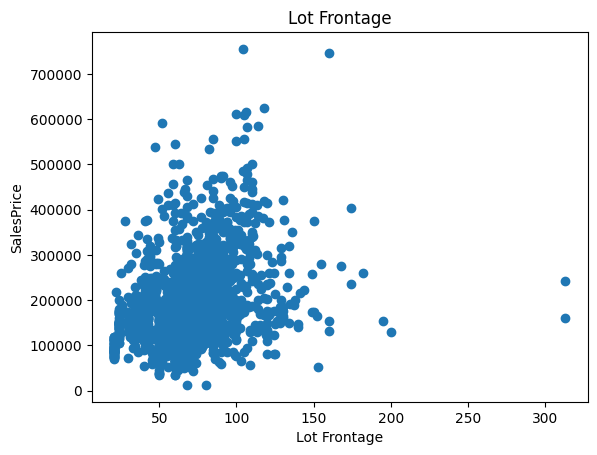

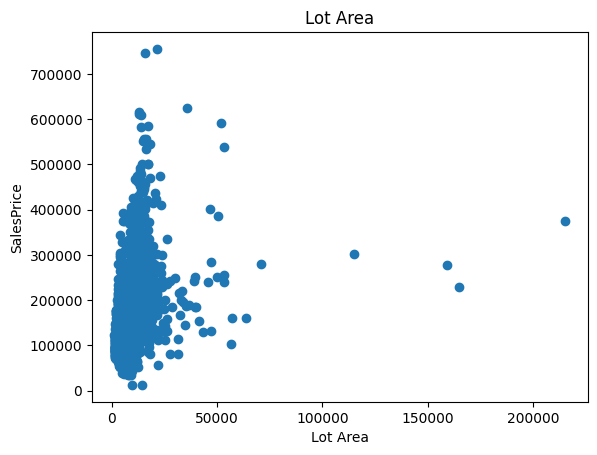

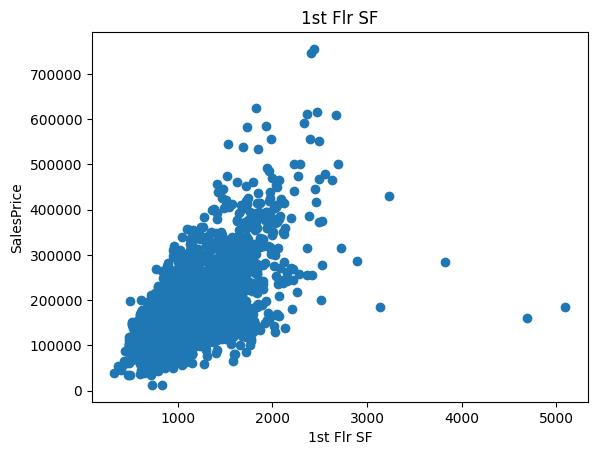

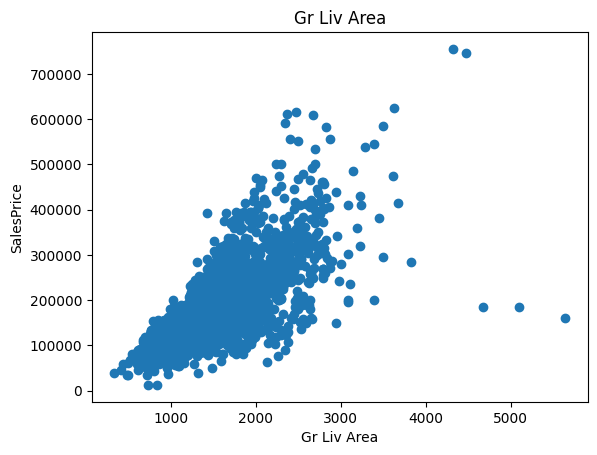

In [14]:
# Calculating Outliers
# Here we will use continuous data only since outliers can only be present in them
# Creating copy of dataset
dataset1=data.copy()
for feature in continuous_features:
    # If there is 0 in the continuous feature then we will not remove outlier for it, since outliers will be removed through log transformation and 0 will arises the error.
    if 0 in dataset1[feature].unique():
        pass
    else:
        # plotting scatterplot, showing outliers before removed
        plt.scatter(dataset1[feature],dataset1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

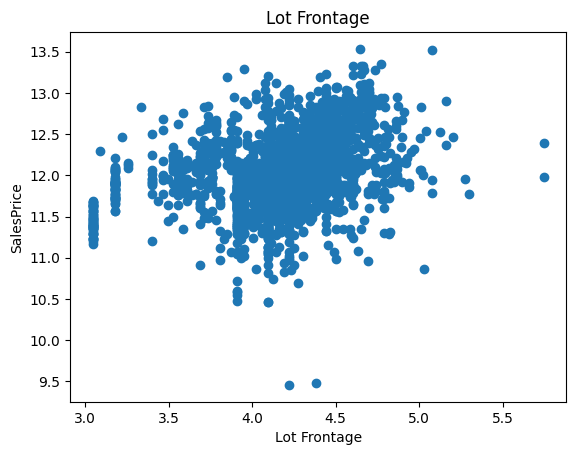

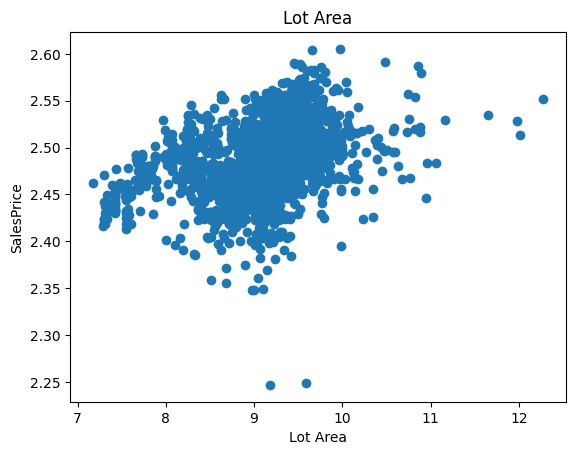

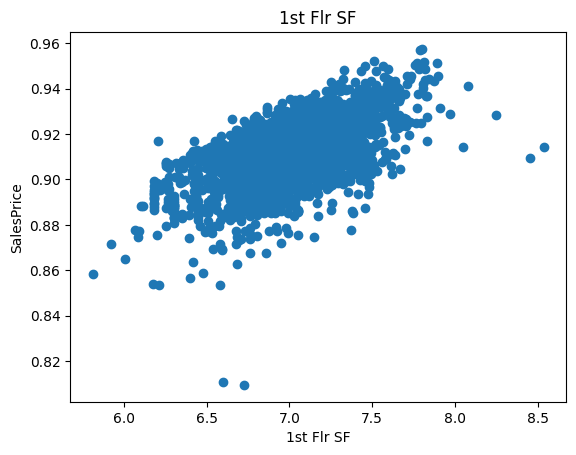

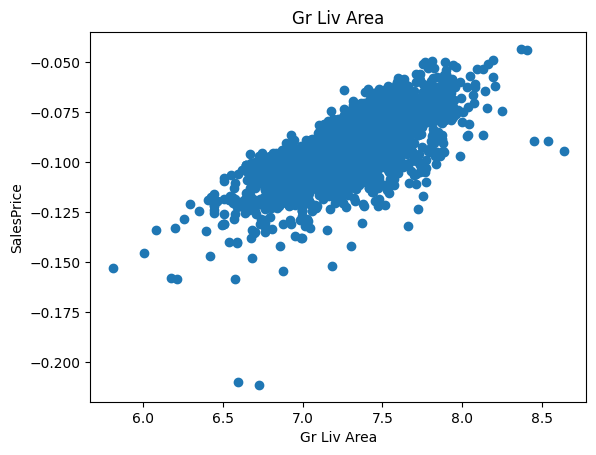

In [15]:
# After removing outliers
dataset2=data.copy()
for feature in continuous_features:
    # If there is 0 in the continuous feature then we will not remove outlier for it, since outliers will be removed through log transformation and 0 will arises the error.
    if 0 in dataset2[feature].unique():
        pass
    else:
        # plotting scatterplot, after removing outliers
        dataset2['SalePrice'] = np.log(dataset2['SalePrice'])
        dataset2[feature] = np.log(dataset2[feature])
        plt.scatter(dataset2[feature],dataset2['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

### TASK 3: Statistical Inferences and Analysis

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\1955705814.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

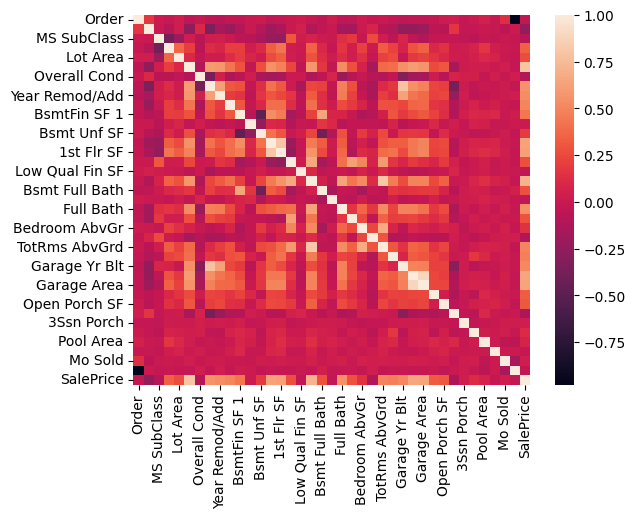

In [16]:
# Checking correlation between features
# Reference: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/#:~:text=A%20correlation%20heatmap%20is%20a,second%20dimension%20as%20a%20column.
sns.heatmap(data.corr())

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


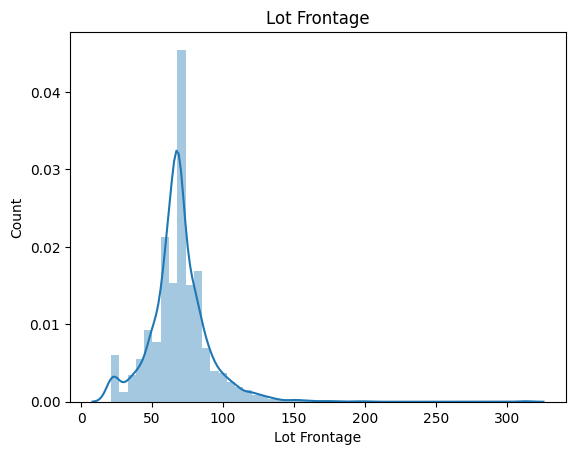

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


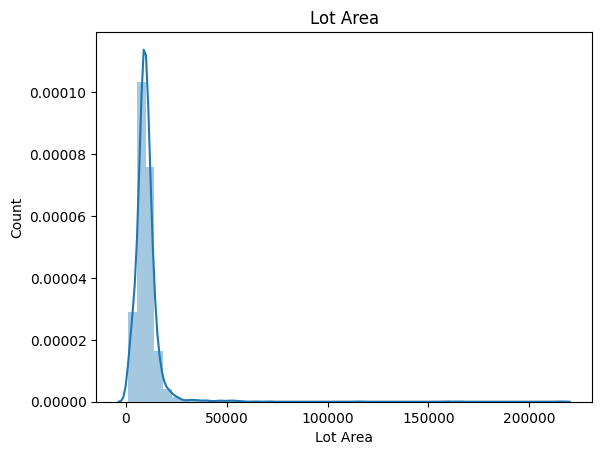

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


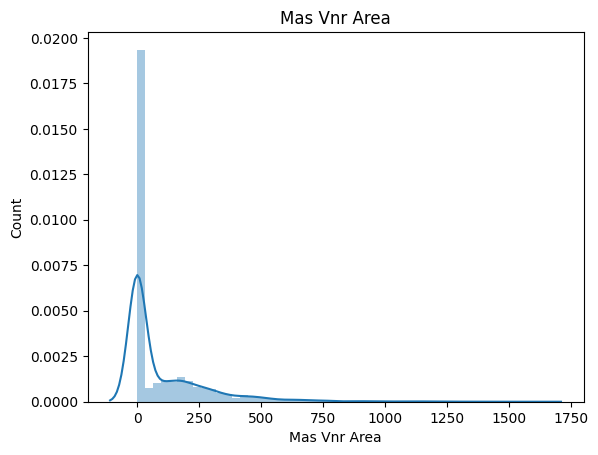

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


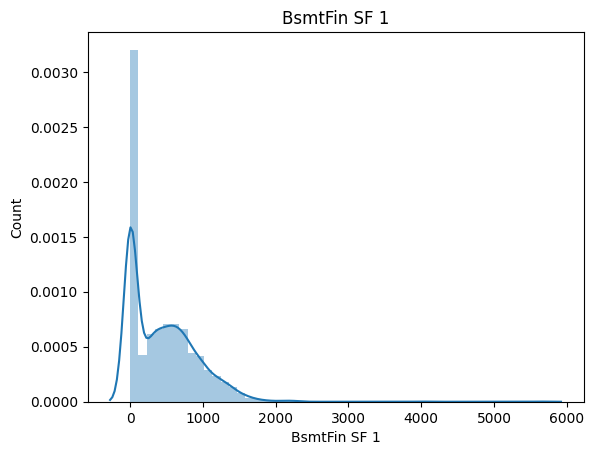

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


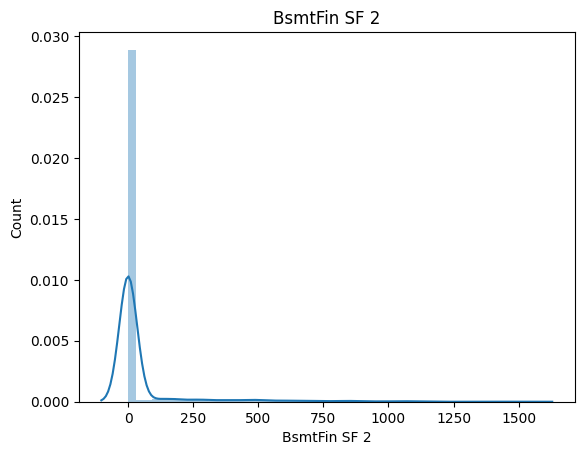

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


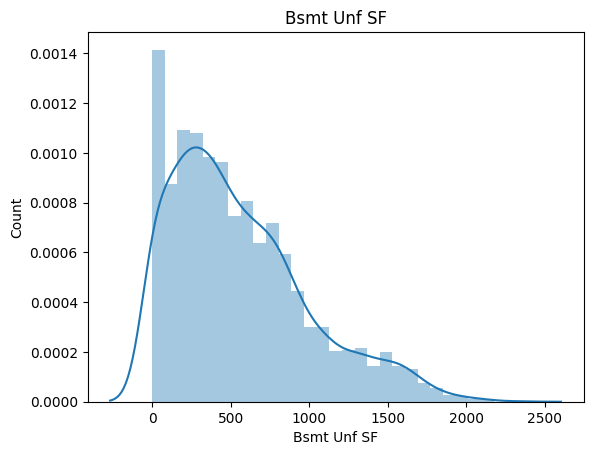

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


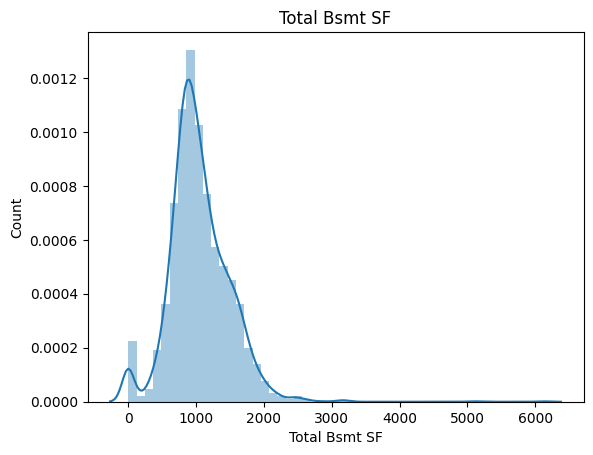

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


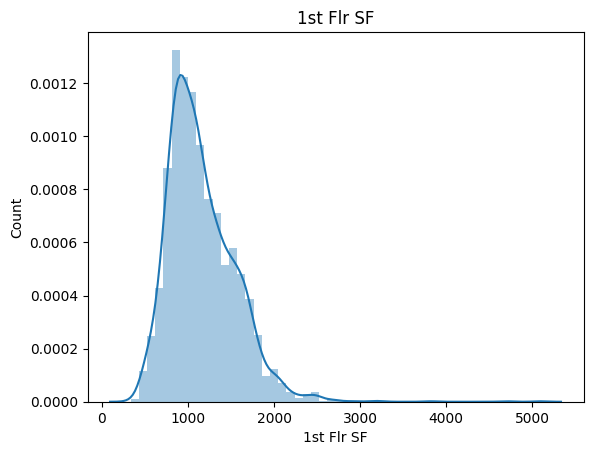

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


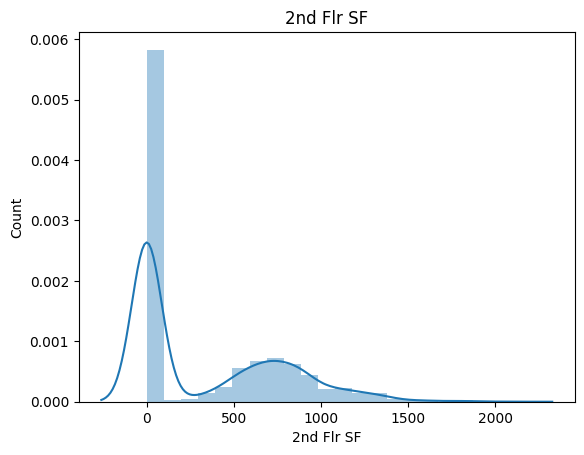

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


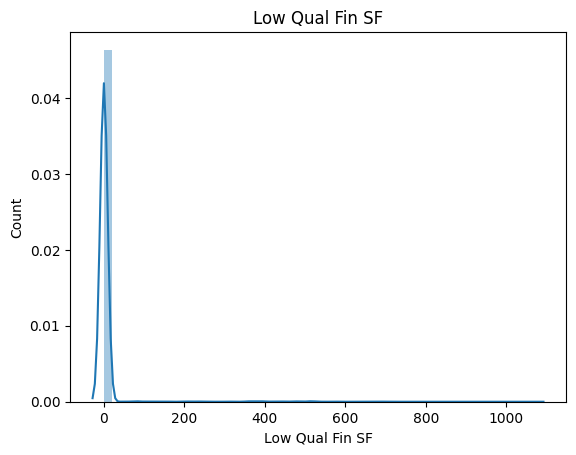

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


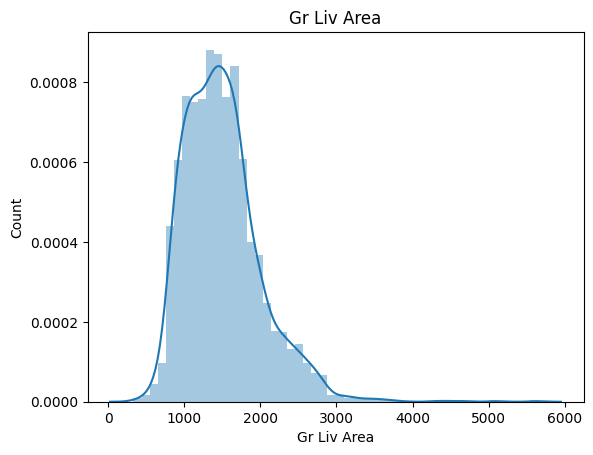

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


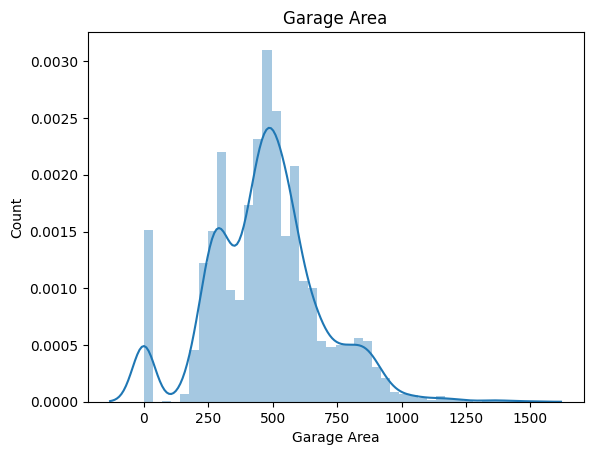

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


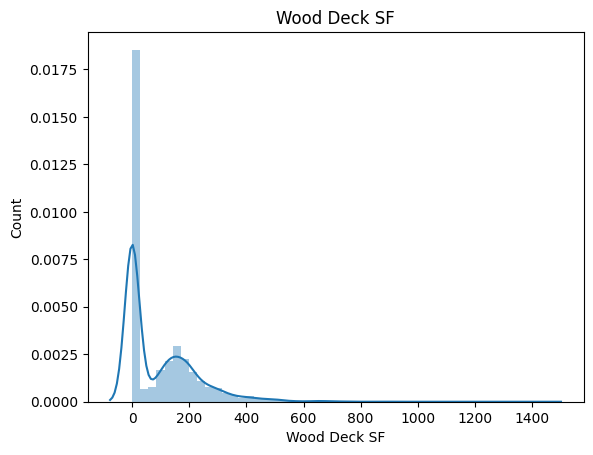

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


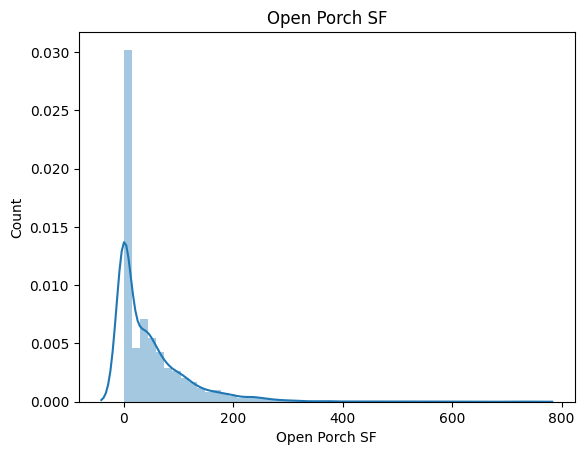

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


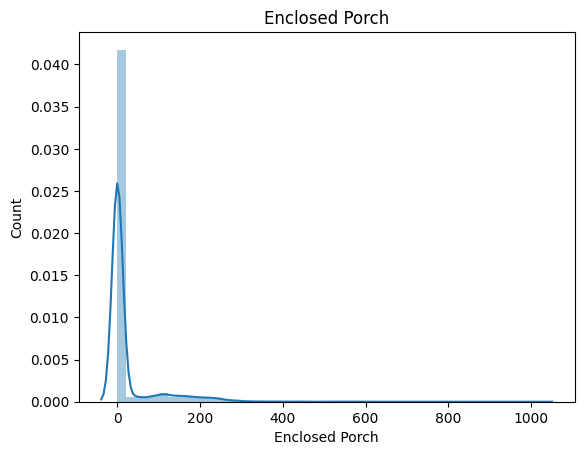

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


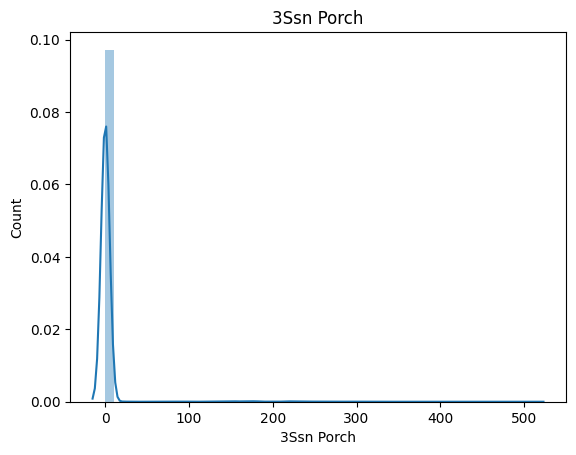

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


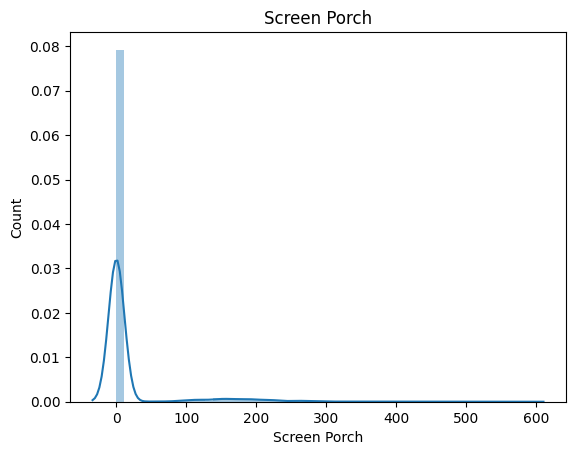

C:\Users\PEPE\AppData\Local\Temp\ipykernel_12612\2903768982.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3[feature])


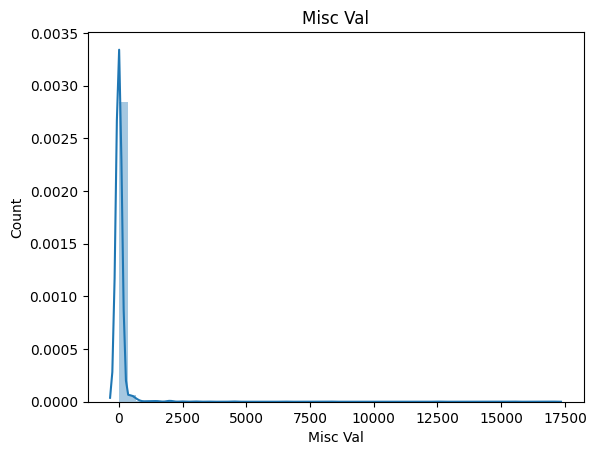

In [17]:
# Checking distribution of continuous variables
# Reference: https://seaborn.pydata.org/generated/seaborn.distplot.html
dataset3=data.copy()
for feature in continuous_features:
    sns.distplot(dataset3[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

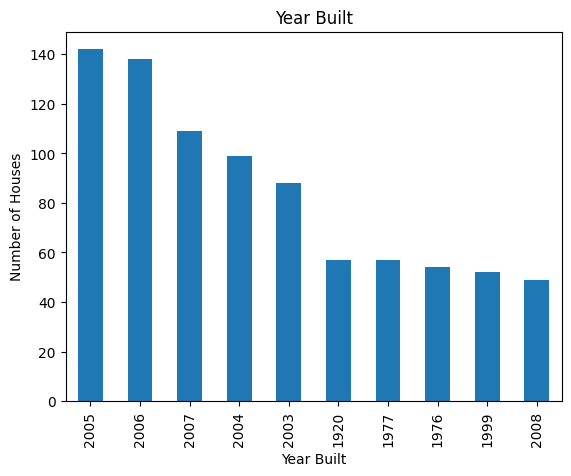

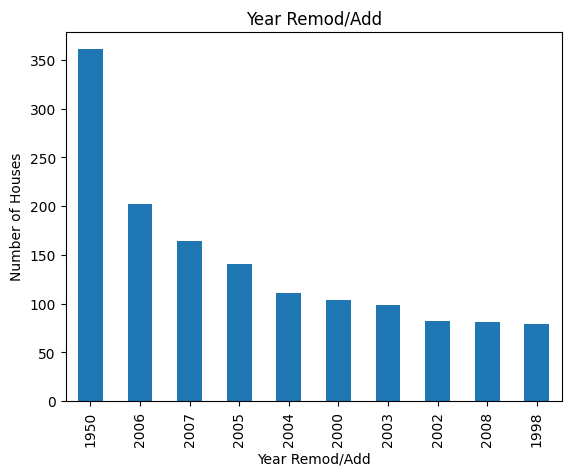

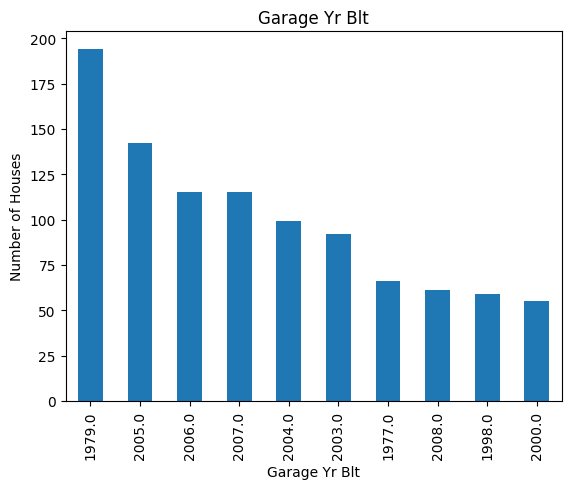

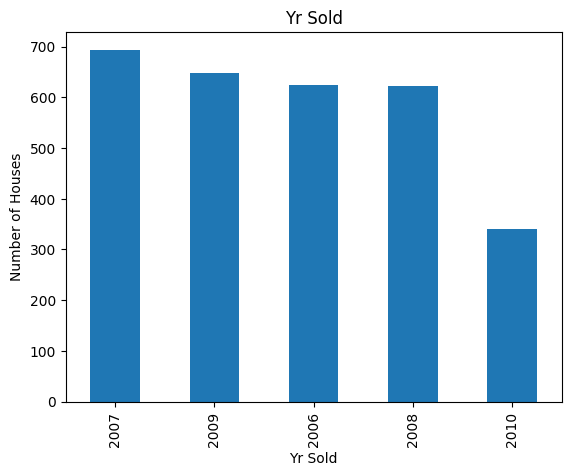

In [18]:
# Checking relationship between year features and target variable
for feature in year_feature:
    data.groupby(feature)['PID'].count().nlargest(10).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Number of Houses')
    plt.title(feature)
    plt.show()

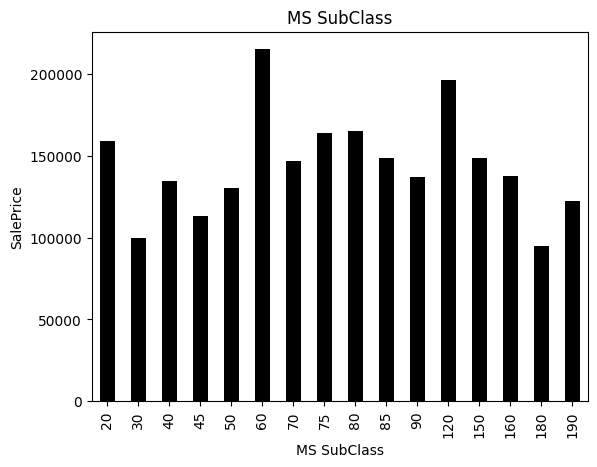

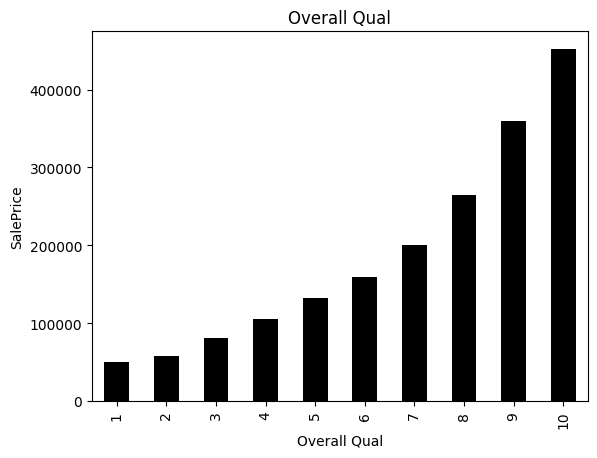

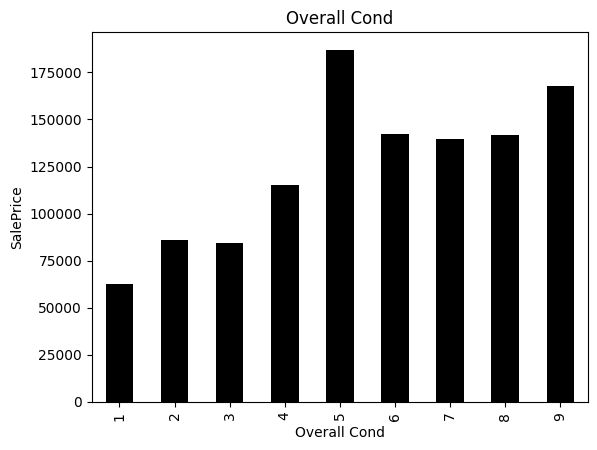

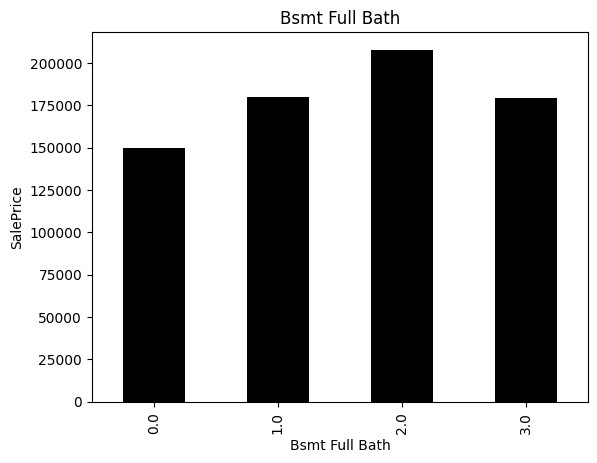

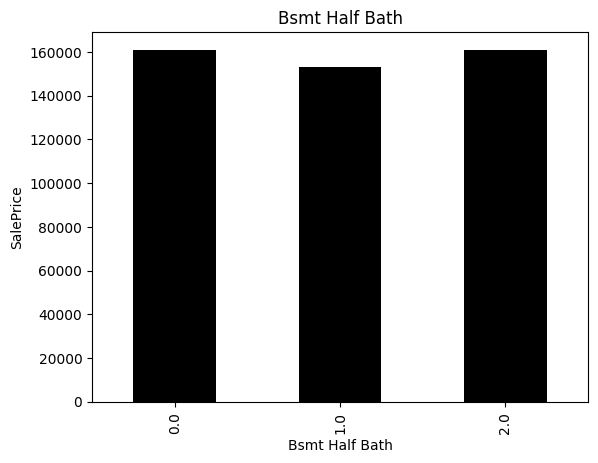

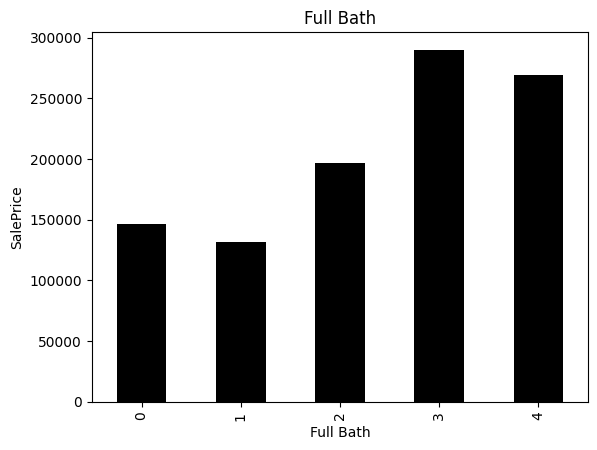

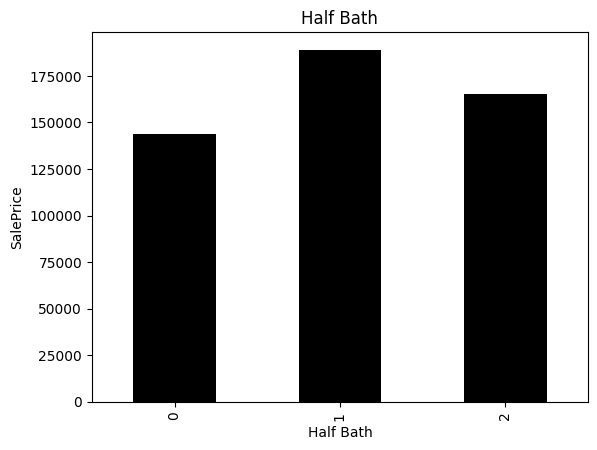

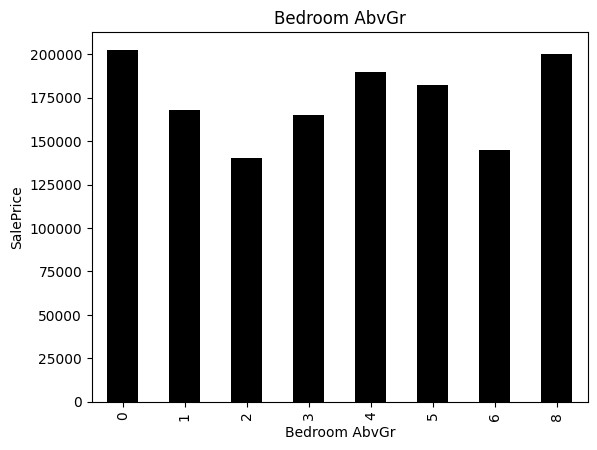

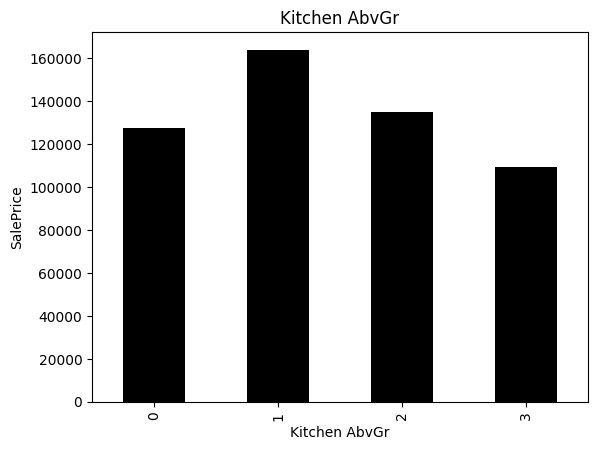

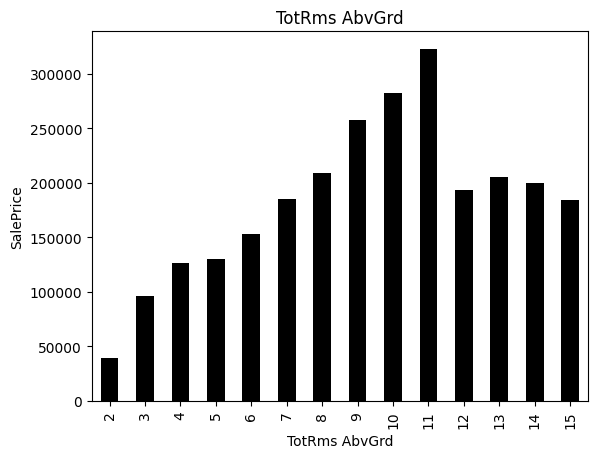

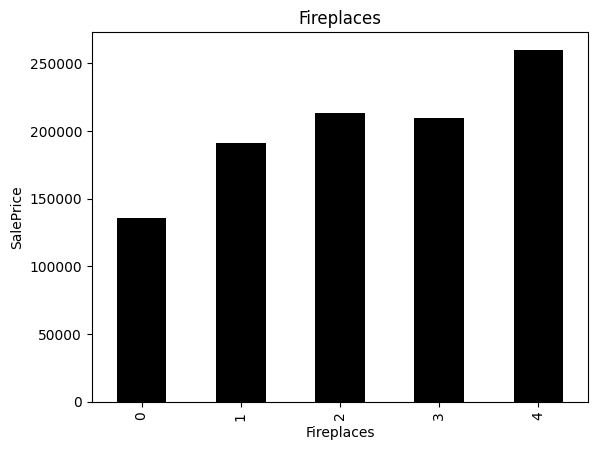

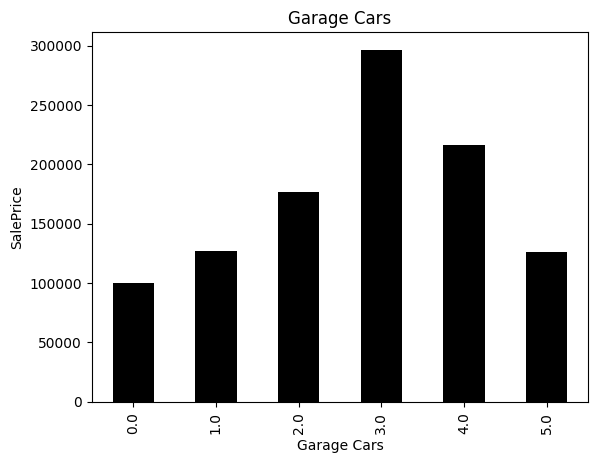

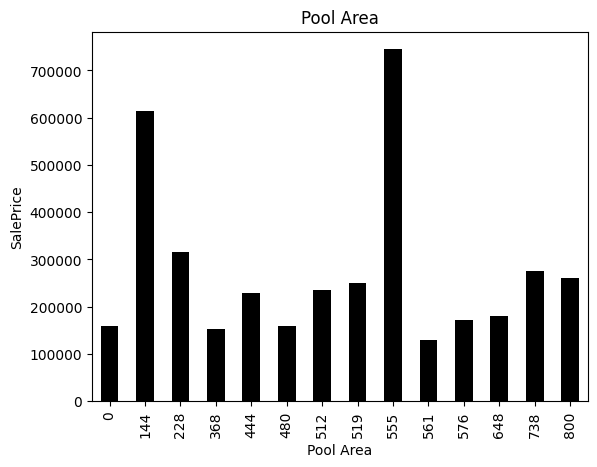

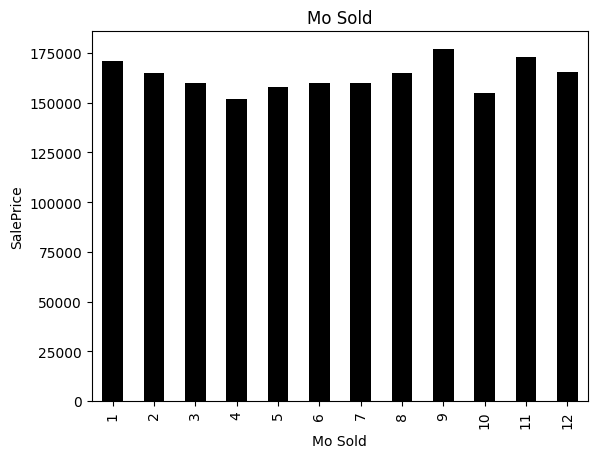

In [19]:
# Checking relationship between discrete features and target variable
dataset4=data.copy()
for feature in discrete_features:
    dataset4.groupby(feature)['SalePrice'].median().plot.bar(color='black')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

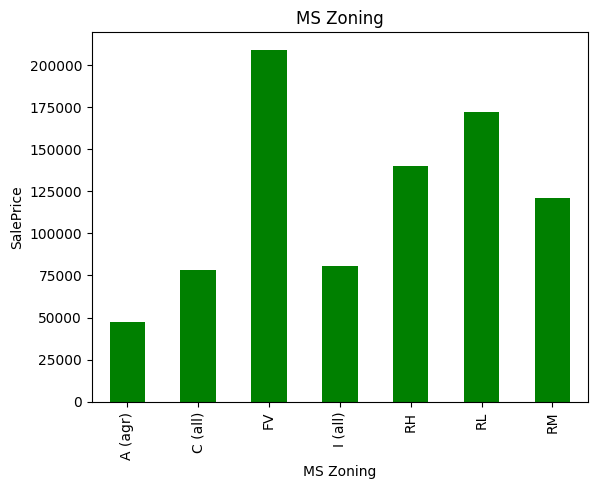

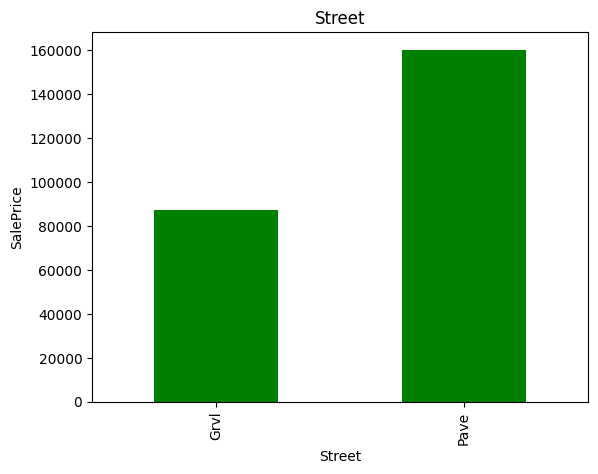

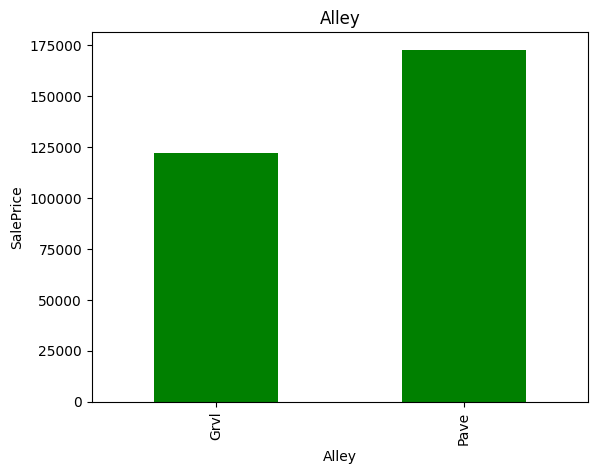

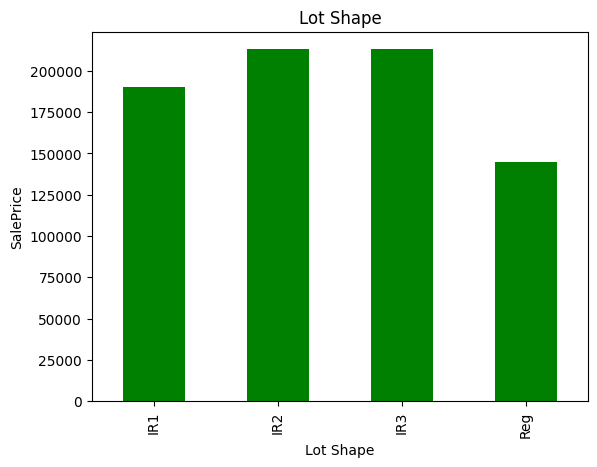

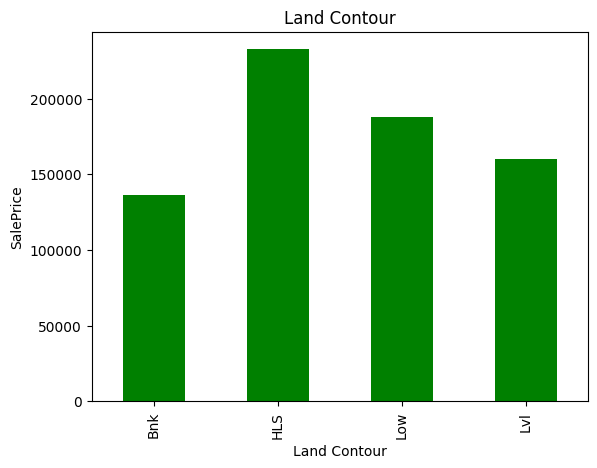

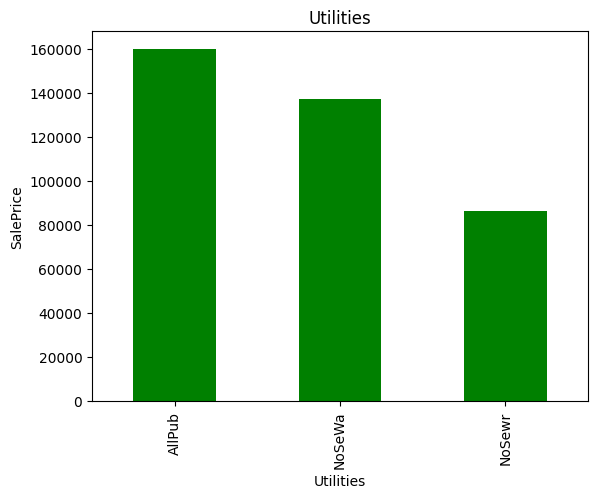

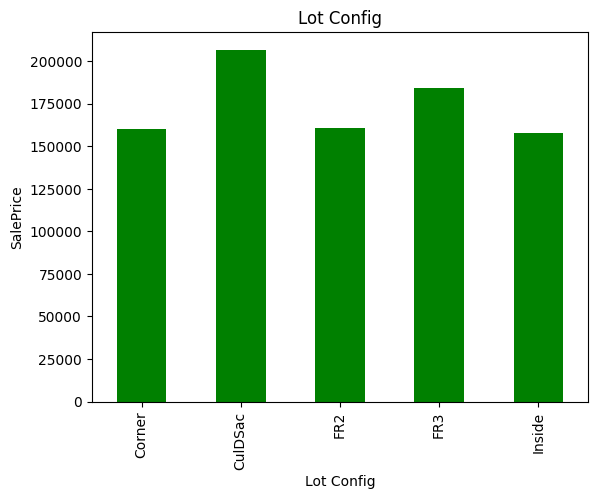

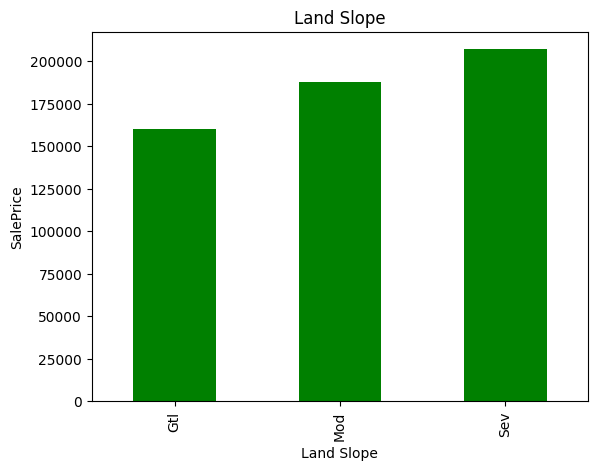

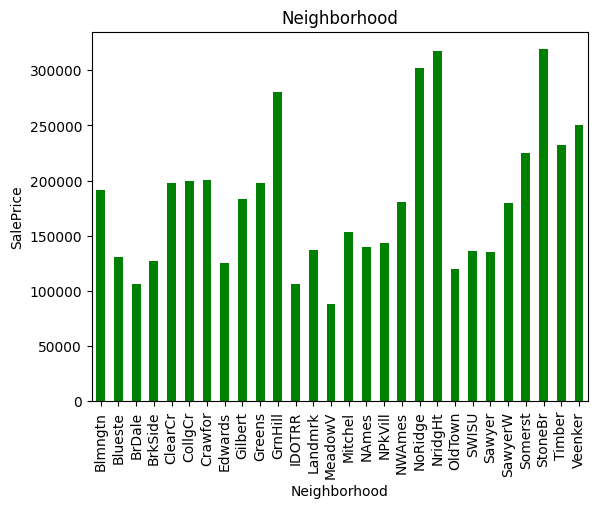

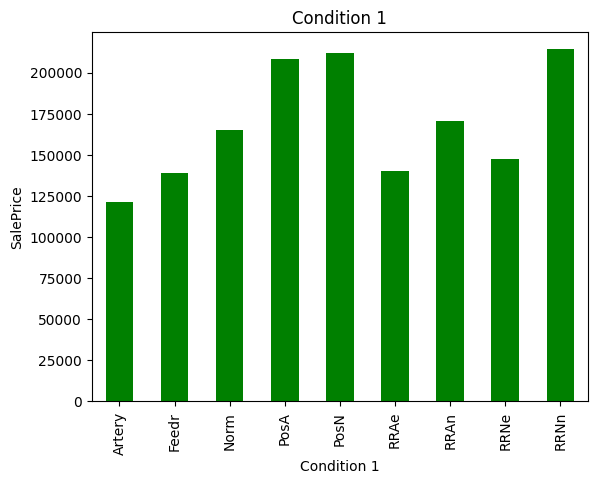

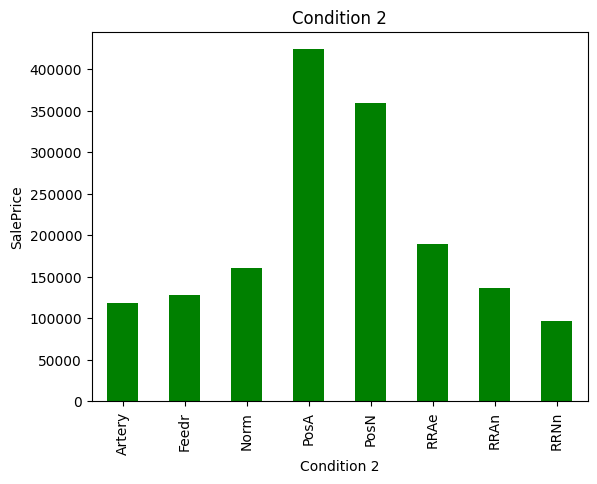

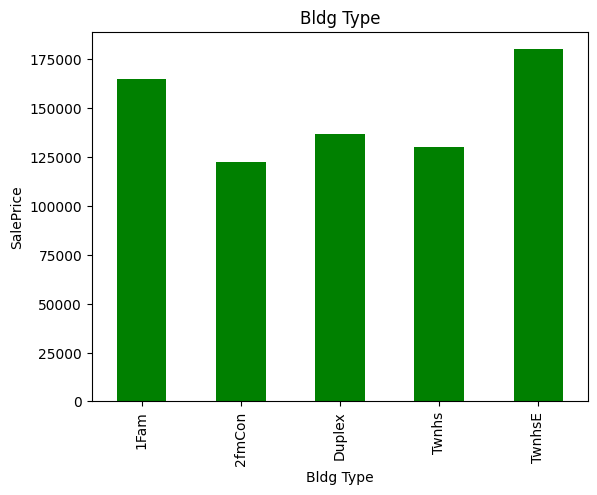

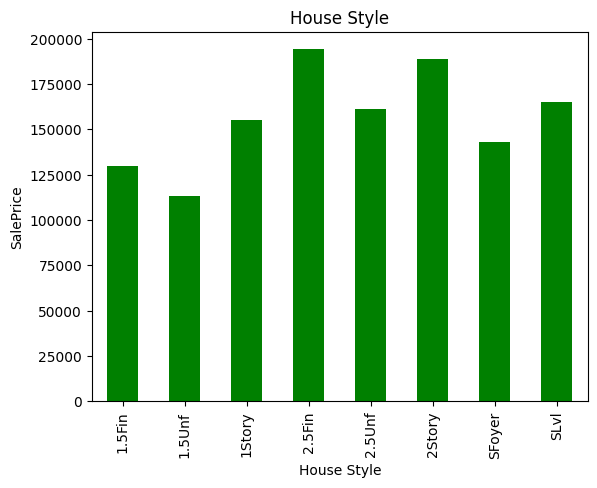

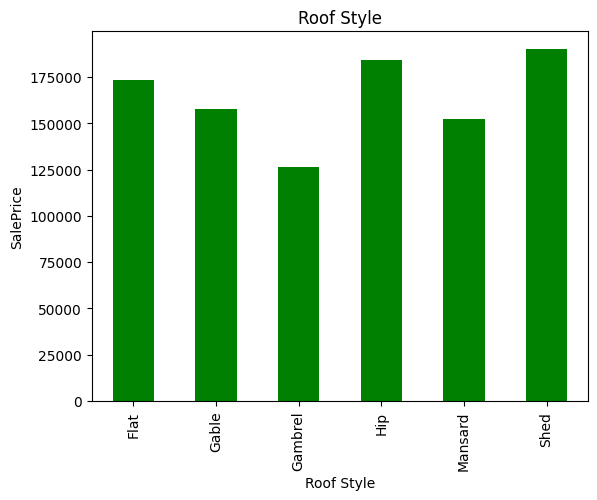

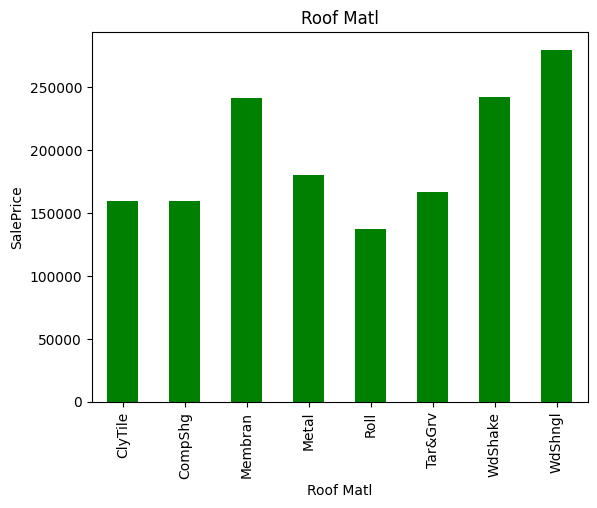

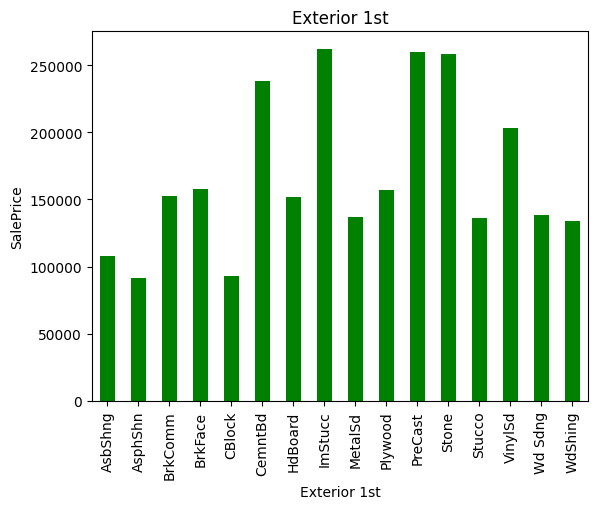

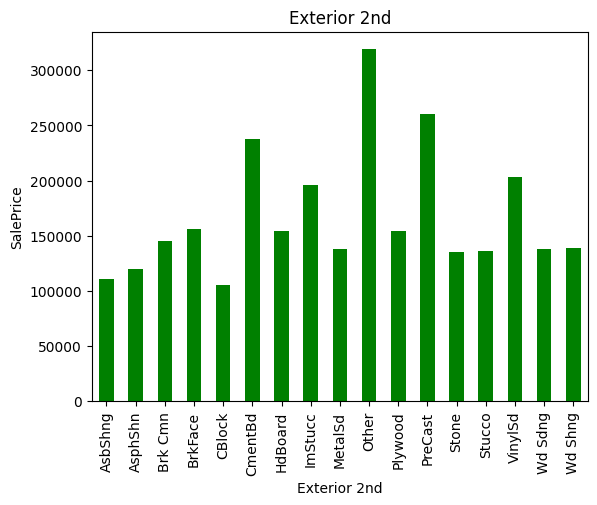

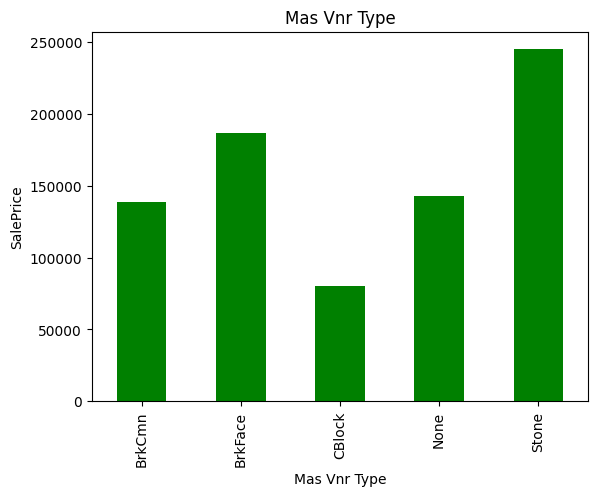

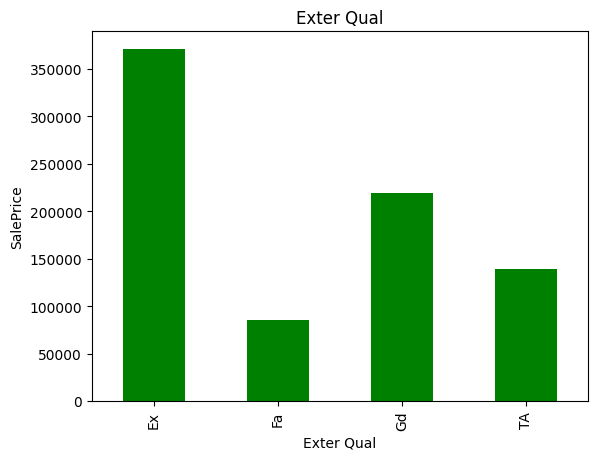

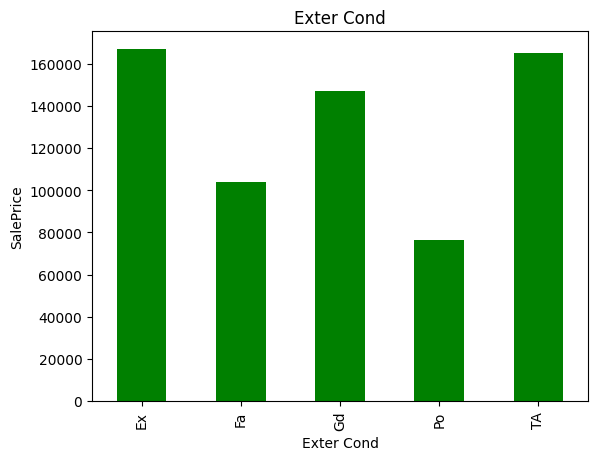

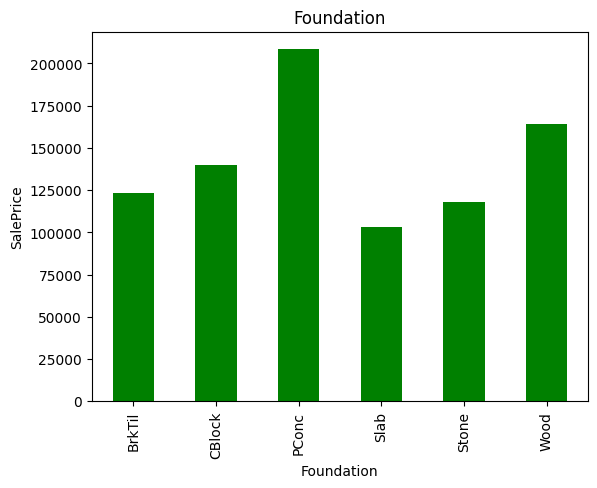

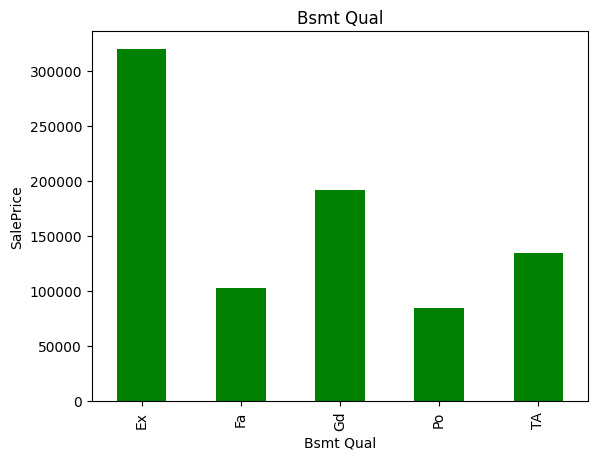

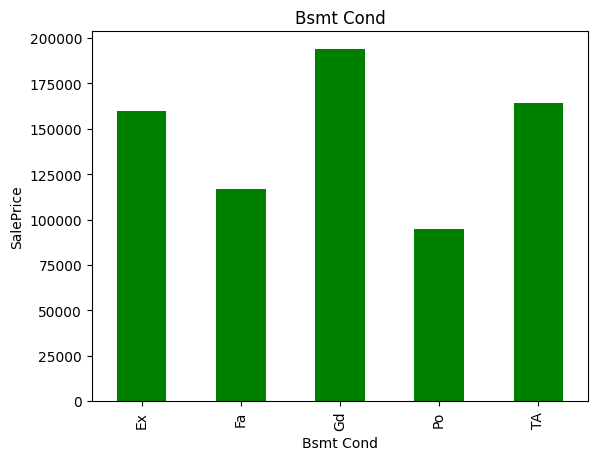

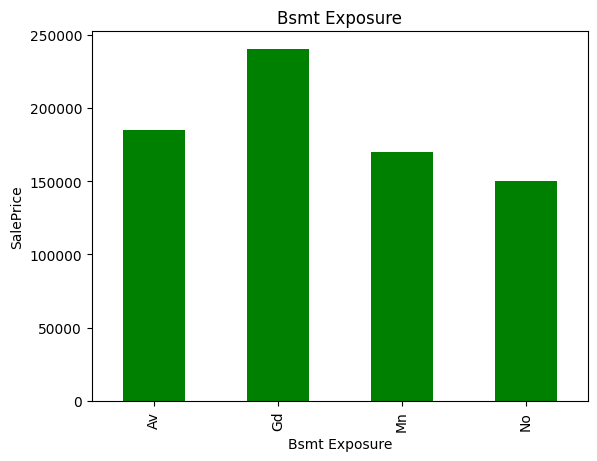

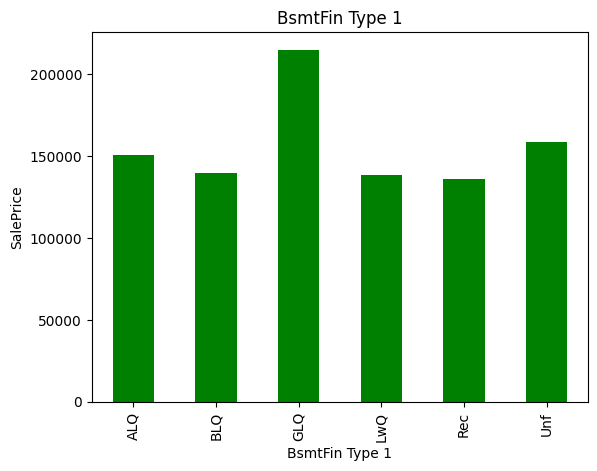

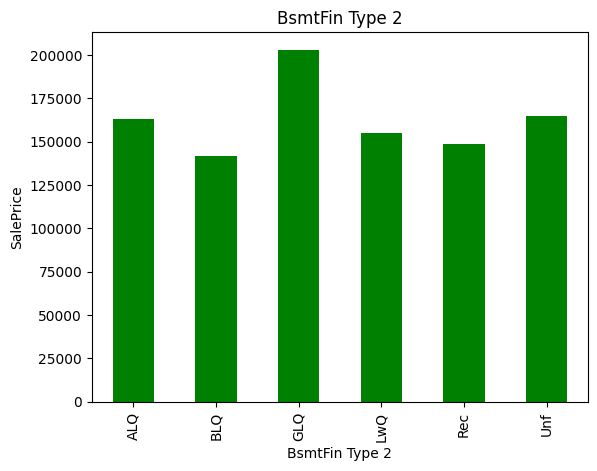

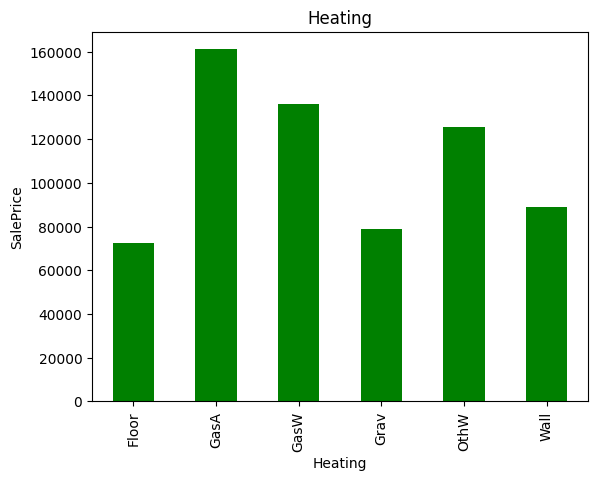

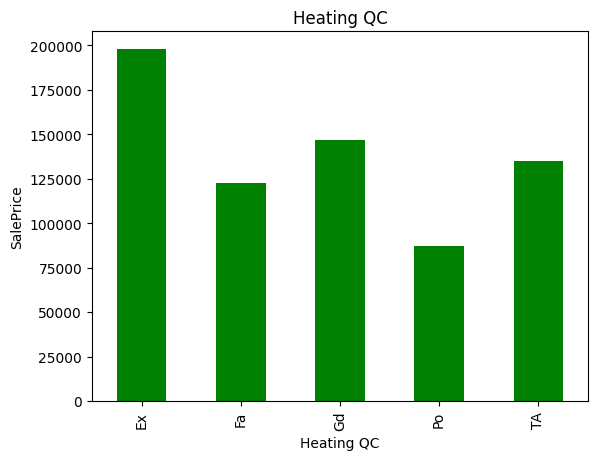

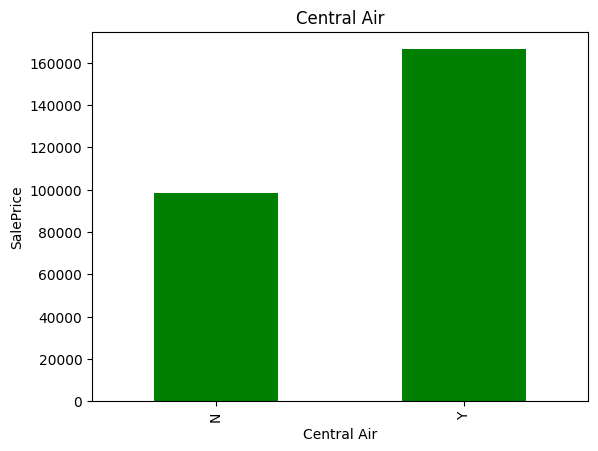

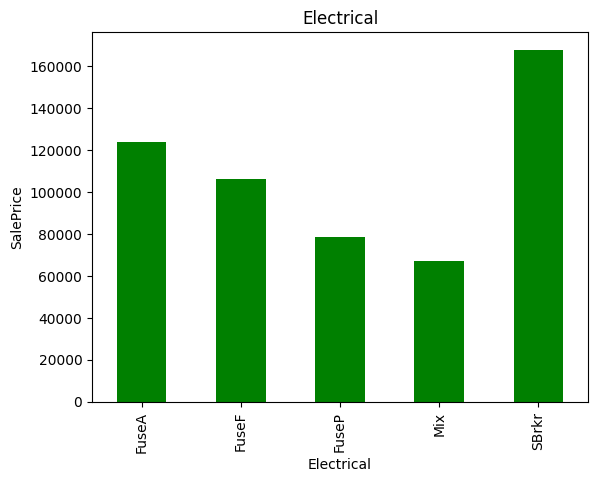

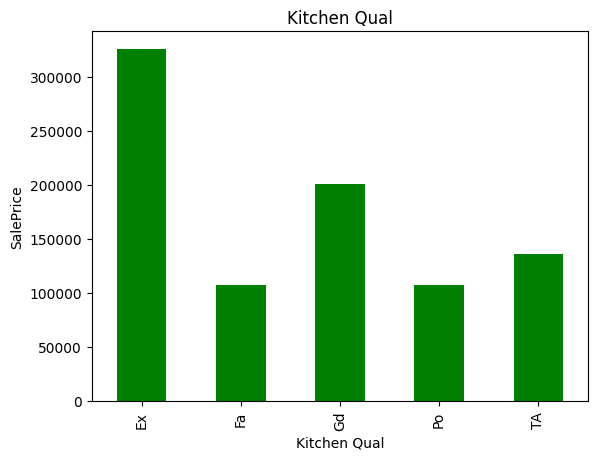

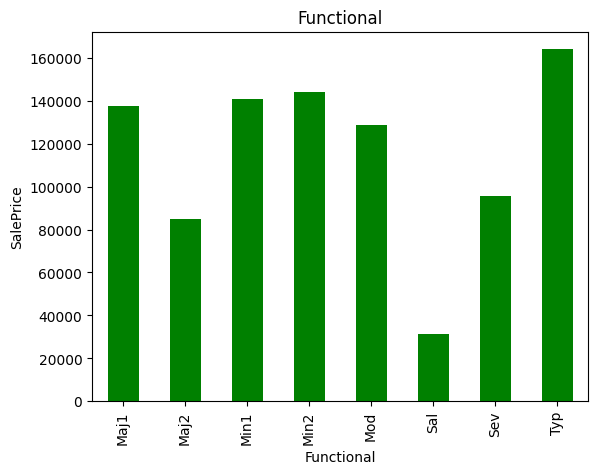

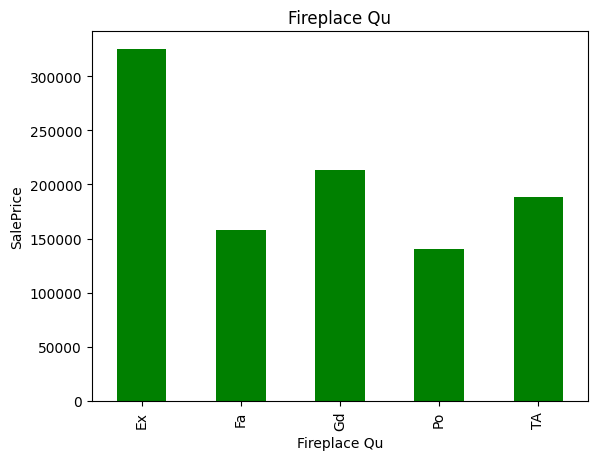

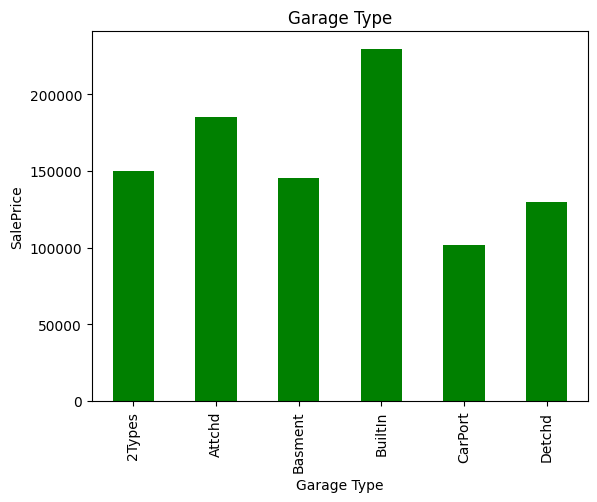

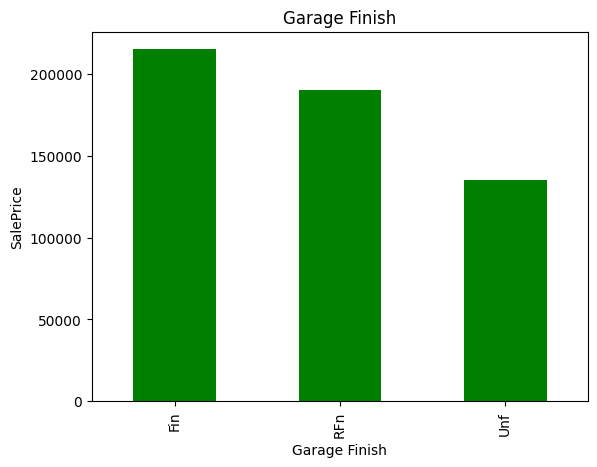

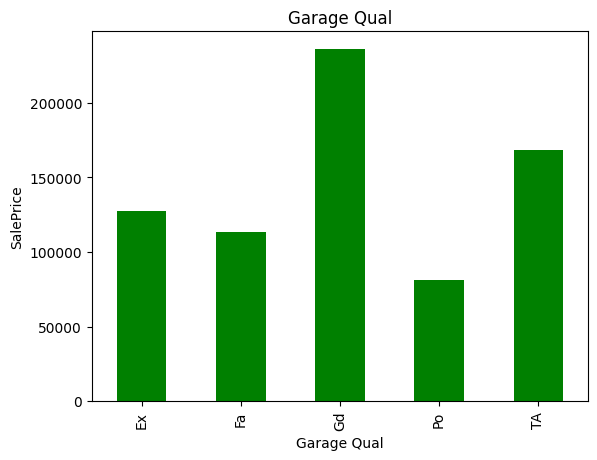

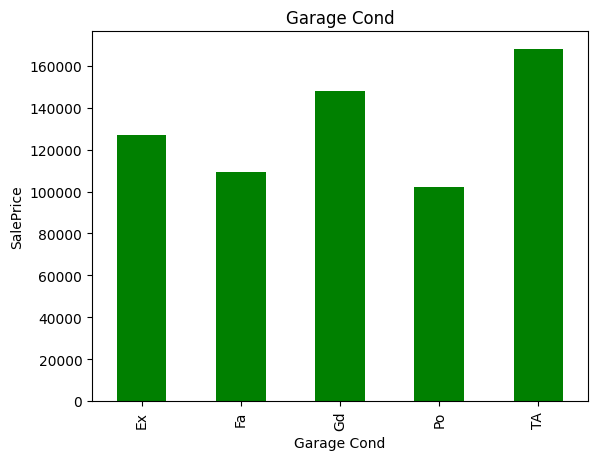

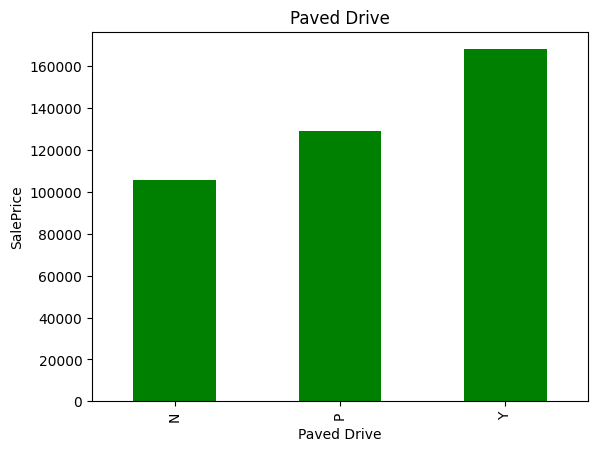

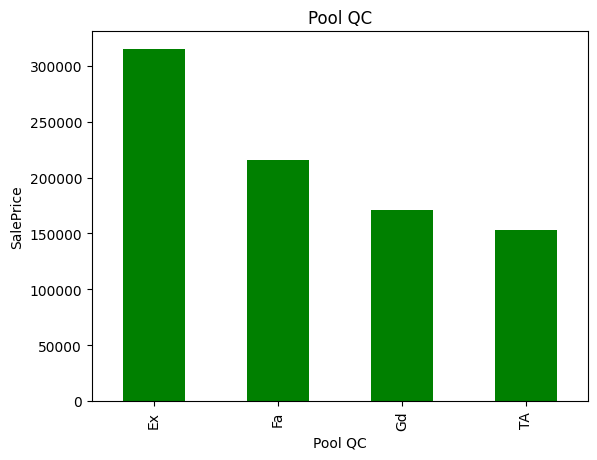

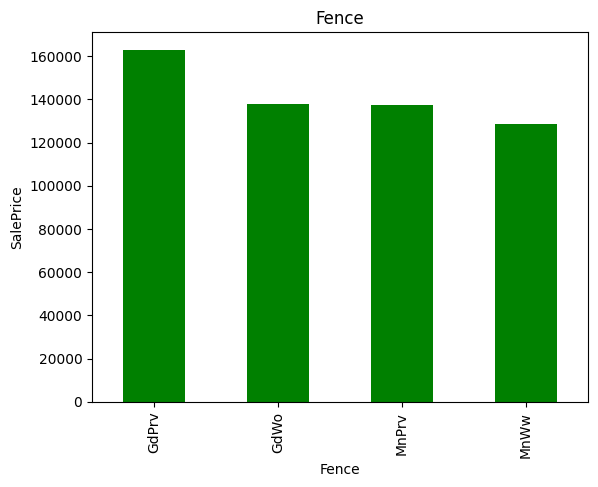

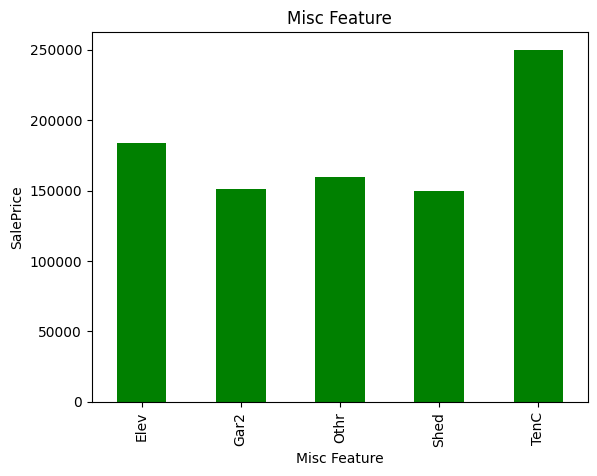

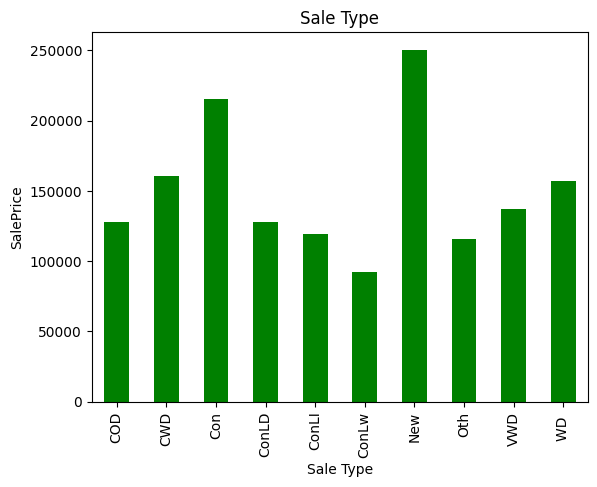

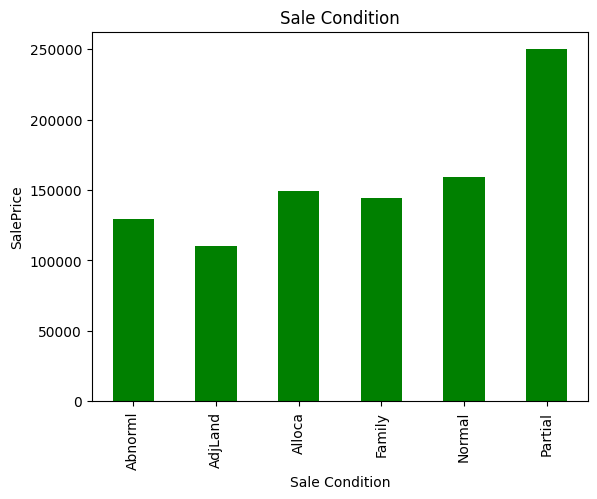

In [20]:
# Checking relationship between categorical features and target variable
dataset5=data.copy()
for feature in categorical_features:
    dataset5.groupby(feature)['SalePrice'].median().plot.bar(color='green')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### TASK 4: Process Summary
#### EDA process summary is as follows
#### 1) I firstly read the data and then take the overview of the data, I got to know how data is structured, what are the different datatypes (using info() method), what is the statistical summary i.e. mean, median, mode, percentiles, etc of numerical variables and count, frequency, mode of categorical variables (using describe method()). Then I divided the variables into 5 types: numerical variables, categorical variables, temporal variables, discrete variables, continuous variables.
#### 2) In second task, I cleaned the data by removing null values, checking for duplicate values and removing outliers (using logarithmic transformation of variables). 
#### 3) In third task, I firstly calculated the correlation between variables to see how much correlation is present between target variable and other features, it will greatly help in feature selection. Then I plot the frequency distribution of variables to check for skewness. After that, I simple plot the bar graphs to find the relationship between target variable and other features and also to gain insights about the data.

### TASK 5: Insights gained
* #### The average sale price of houses is $180,796.

* #### The cheapest house sold for $12,789 and the most expensive house was 

$755,000.

* #### Most expensive houses belongs to the neighbourhood of StoneBr.

* #### New houses have higher sale price (this is self explanatory and is mainly occurs in real life).

* #### Houses with excellent pool quality and exterior conditions are very expensive.

* #### Majority of the houses were built in 2005.

* #### Approximately 700 houses were sold in 2007.

* #### Sale Price is strongly positive correlated with year of modification.

* #### Houses with large number of fire areas and greater garage capacity tends to have high prices.
#### Here the list goes on regarding the insights, only the notable insights are mentioned above which can play the vital role in deciding the sales price of a house.

### TASK 6: Methods Used
* #### data.head() = To read first five rows of dataset
* #### data.info() = To get information about data type
* #### data.shape() = To get number of rows/columns
* #### data.describe() = To get the statistical summary
* #### data.select_dtypes() = To select columns based on their data types
* #### data.drop() = To drop/remove columns
* #### data.fillna() = To fill null values with specified value
* #### data.isna().sum() = To calculate amount of null values in each column
* #### data.mean() = To get mean value
* #### data.mode() = To get mode value
* #### data.duplicated().sum() = To calculate amount of duplicated values
* #### data.corr() = To get correlation matrix
* #### np.log() = To use logarithmic transformation
* #### sns.heatmap() = To make a heatmap
* #### sns.distplot() = To make a frequency distribution plot
* #### plt.scatter() = To make a scatter plot
* #### data.groupby() =  To combine data based on some aggregating function
* #### data.nlargest() = To get high values only
* #### data.median() = To get median value
* #### data.plot() = To plot the graph
* #### data.copy() = To make the copy of the dataset
* #### data.unique() = To get the list of unique values
* #### plt.xlabel() = To write the x-axis label of graph
* #### plt.ylabel() = To write the y-axis label of graph
* #### plt.show() = To show the graph